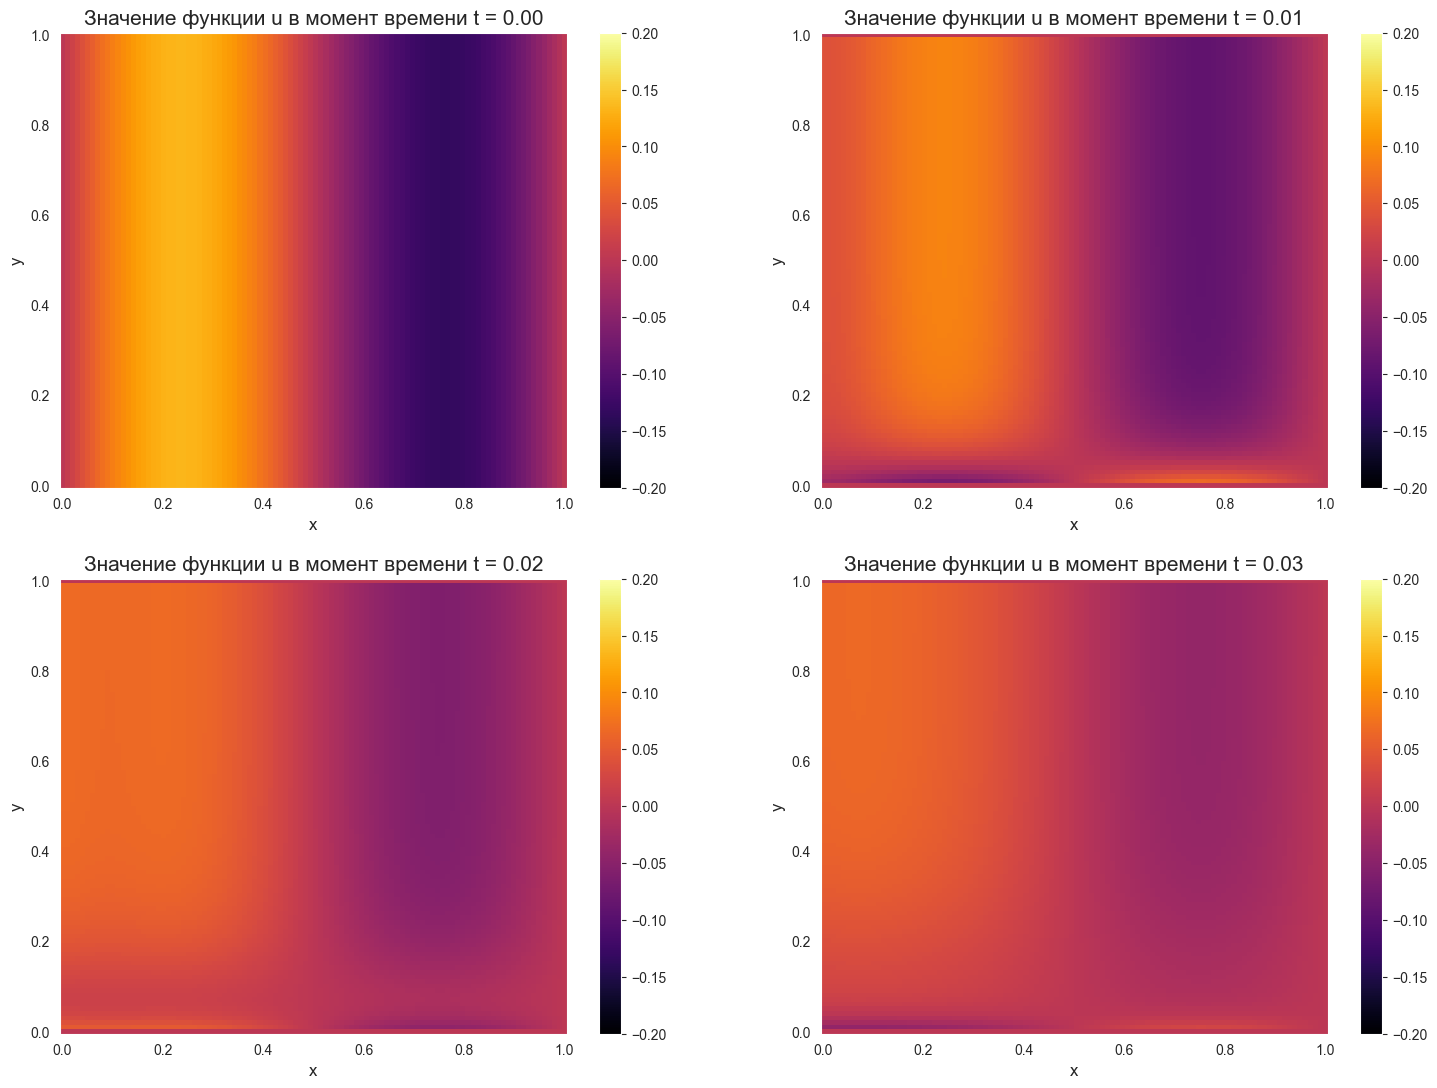

In [3]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
sns.set_style("darkgrid")

# %% [markdown]
# Вспомогательные константы, массивы для x, y, t и разностной сетки

# %%
Nx, Ny = 100, 100
M, T = 100, 1

x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
t = np.linspace(0, T, M)

h_x = x[1] - x[0]
h_y = y[1] - y[0]
t = t[1] - t[0]

gamma_x = t / (h_x**2)
gamma_y = t / (h_y**2)

u = np.zeros((Nx, Ny, 2 * M + 1))

# %% [markdown]
# Вспомогательные функции

# %%
def F_1(i1, i2, j):
    return 0.5 * gamma_y * (u[i1, i2-1, j-1] + u[i1, i2+1, j-1]) + \
        (1 - gamma_y) * u[i1, i2, j-1] + \
        0.5 * t * (t * (j + 1) /2)**2 * x[i1] * y[i2]

def F_2(i1, i2,j):
    return 0.5 * gamma_x * (u[i1-1, i2, j-1] + u[i1+1, i2, j-1]) + \
        (1 - gamma_x) * u[i1, i2, j-1] +\
        0.5 * t * (t * (j - 1) /2)**2 * x[i1] * y[i2]

# %% [markdown]
# Вспомогательные функции для метода прогонки

# %%
def progonka_x(i2, j):
    d, sigma = np.zeros(Nx), np.zeros(Nx)
    d[1], sigma[1] = 0, 0
    
    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x

    for m in range(1, Nx - 1):
        Fm = - F_1(m, i2, j)
        d[m + 1] = C / (B - A * d[m])
        sigma[m + 1] = (Fm - A * sigma[m]) / (A * d[m] - B)
    u[Nx-1, i2, j] = sigma[-1] / (1 - d[-1])

    for m in range(Nx - 1, 0, -1):
        u[m-1, i2,j] = d[m] * u[m,i2, j] + sigma[m]

def progonka_y(i1,j):
    d, sigma = np.zeros(Ny), np.zeros(Ny)
    
    d[1], sigma[1] = 1, 0

    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y

    for m in range(1, Ny - 1):
       Fm = - F_2(i1, m, j)
       d[m + 1] = C / (B - A * d[m])
       sigma[m + 1] = (Fm - A * sigma[m]) / (A * d[m] - B)
    u[i1, Ny-1, j] = 0

    for m in range(Ny - 1, 0, -1):
        u[i1, m-1, j] = d[m] * u[i1, m, j] + sigma[m]


# %% [markdown]
# Начальные условия + метод прогонки

# %%
u[:, :, 0] = np.cos(np.pi * x) * x * (1 - x)

for j in range(1, 2 * M, 2):
    for i2 in range(1, Ny - 1):
       progonka_x(i2, j)

    for i1 in range(1, Nx - 1):
       progonka_y(i1, j + 1)

# %% [markdown]
# Строим графики при различных значениях t

# %%
# times = [0.0, 0.01, 0.02, 0.03]
times = [0]
fig = plt.figure(figsize = (18, 13))

for i in range(len(times)):
    plt.subplot(2, 2, i + 1)
    r = int(times[i] / T * (2 * M))

    plt.pcolormesh(y, x, u[:, :, r], vmin = -0.2, vmax = 0.2, cmap="inferno")
    plt.colorbar()

    plt.ylabel("y", fontsize = 12)
    plt.xlabel("x", fontsize = 12)
    plt.title(f"Значение функции u в момент времени t = {times[i]:.2f}", fontsize = 15)

fig.savefig("first.png")

# %%

## Достроить графики для координат (с фиксированной второй координатой)
## Построить график погрешности

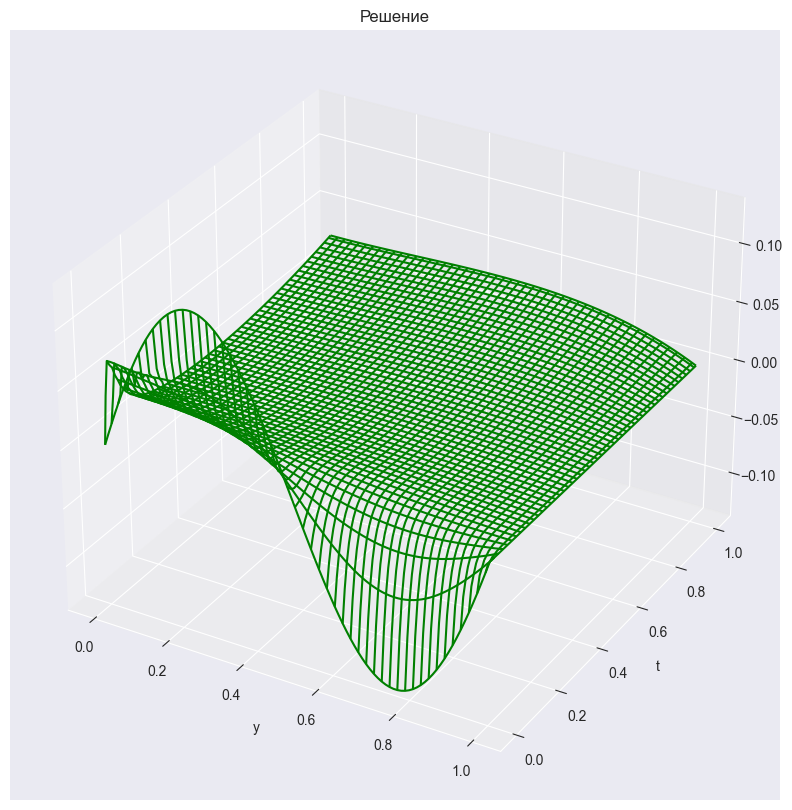

In [33]:
t = np.linspace(0, 1, num=M)
y = np.linspace(0, 1, num=M)
Y, T = np.meshgrid(y, t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(T, Y, u[50, :, 0:-1:2], color="green")

plt.title('Решение')
plt.xlabel('y')
plt.ylabel('t')
plt.savefig("result.png")


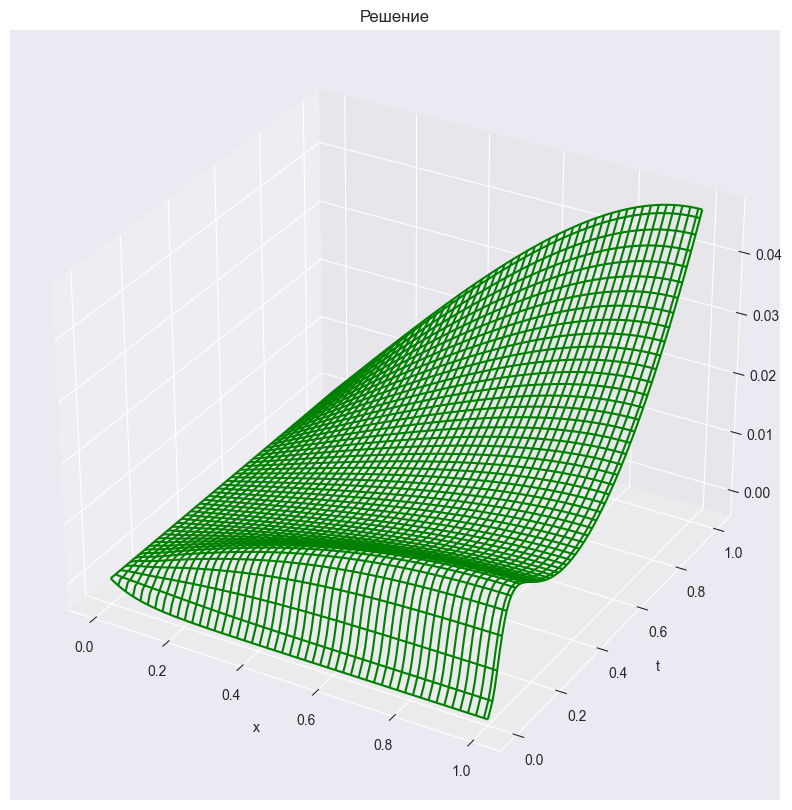

In [44]:
t = np.linspace(0, 1, num=M)
x = np.linspace(0, 1, num=M)
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(T, X, u[:, 50, 1::2], color="green")

plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.savefig("result.png")


ValueError: too many values to unpack (expected 1)

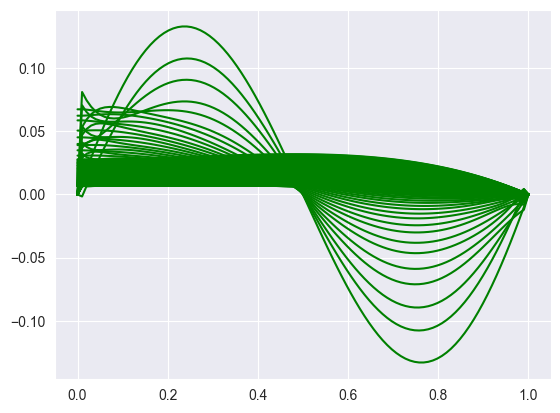

In [13]:
fig, ax = plt.subplots()
t = np.linspace(0, T, M)
line, = ax.plot(t, u[50, :, :], color="g")
ax.set_title("x = 50, fixed")
ax.set_xlabel("y")
ax.set_ylabel("u")
ax.set_ylim(-0.2, 0.2)

def animate(i):
    line.set_ydata(u[50, :, i])
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=1, blit=True, save_count=50)

ani.save("x_fixed.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


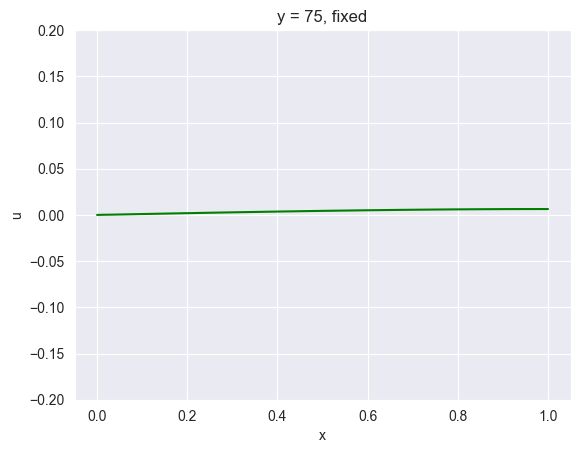

In [ ]:
fig, ax = plt.subplots()
line, = ax.plot(t, u[:, 75, 0], color="g")
ax.set_title("y = 75, fixed")
ax.set_ylim(-0.2, 0.2)
ax.set_xlabel("x")
ax.set_ylabel("u")

def animate(i):
    line.set_ydata(u[:, 75, i])
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=1, blit=True, save_count=50)

ani.save("y_fixed.gif")

Сравнение с аналитическим решением

In [ ]:
def u_a(x, y, t):
    res = 0
    for n in range(1, 5):
        for m in range(1, 5):
            res += 2 * np.sin(np.pi*n*x)*np.cos(np.pi*m*y)*(-(4*(-1)**n*np.exp((-np.pi**2*n**2*t)-np.pi**2*m**2*t))/(np.pi**9*m**2*n**7+3*np.pi**9*m**4*n**5+3*np.pi**9*m**6*n**3+np.pi**9*m**8*n))-(4*np.exp((-np.pi**2*n**2*t)-np.pi**2*m**2*t))/(np.pi**9*m**2*n**7+3*np.pi**9*m**4*n**5+3*np.pi**9*m**6*n**3+np.pi**9*m**8*n)+((np.pi**2*n**2*((-4*(-1)**n)-4)+np.pi**2*m**2*((-4*(-1)**n)-4))*t+t**2*(np.pi**4*m**2*n**2*(4*(-1)**n+4)+np.pi**4*n**4*(2*(-1)**n+2)+np.pi**4*m**4*(2*(-1)**n+2))+4*(-1)**n+4)/(np.pi**9*m**2*n**7+3*np.pi**9*m**4*n**5+3*np.pi**9*m**6*n**3+np.pi**9*m**8*n)
    for n in range(1, 10):
        for m in range(1, 10):
            res += np.sin(np.pi*n*x)*np.cos(np.pi*m*y)*np.exp(-((np.pi*n)**2+(np.pi*m)**2)*t)*\
            (-(np.pi*(1+n)*(np.sin(np.pi*(1+n))+np.cos(np.pi*(1-n))+2*np.cos(np.pi*(1+n))+np.cos(np.pi*(1-n))))/(2*(np.pi*(1+n))**3))
    return res

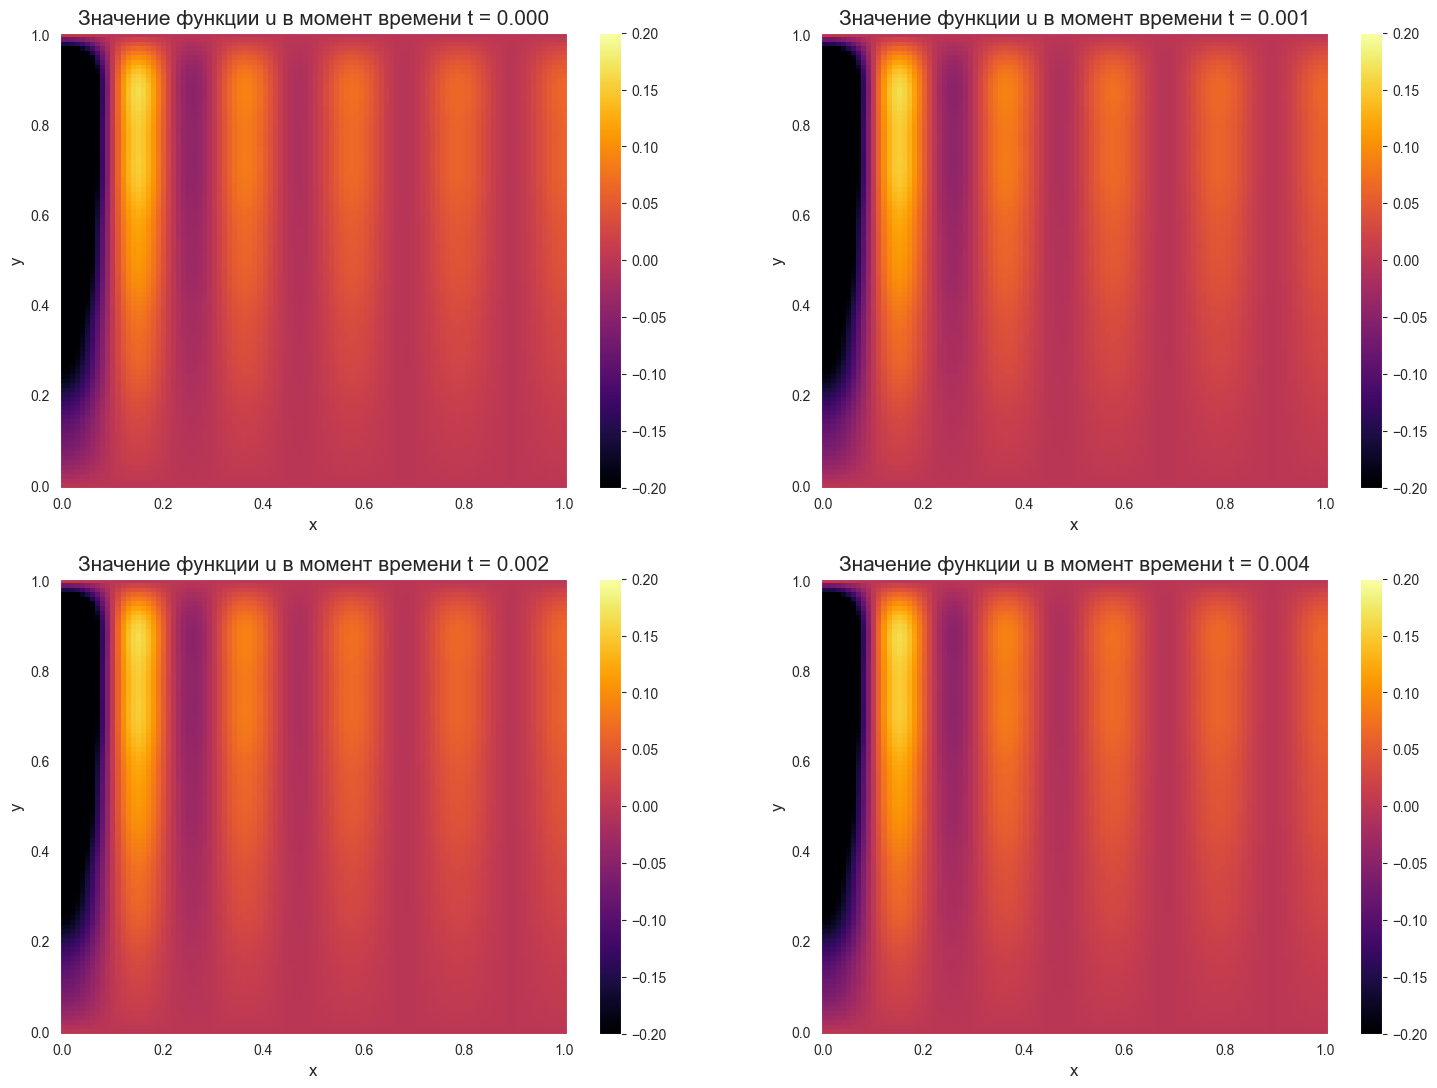

In [ ]:
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
tim = np.linspace(0, 1, 2*M+1)

u = np.zeros((Nx, Ny, 2 * M + 1))

times = [0.0, 0.001, 0.002, 0.004]
# times = [0.02]
fig = plt.figure(figsize = (18, 13))

for i in range(len(times)):
    plt.subplot(2, 2, i + 1)
    r = int(times[i] / T * (2 * M))

    for n in range(Nx):
        for m in range(Ny):
            u[n, m, r] = u_a(x[n], y[m], r)

    plt.pcolormesh(y, x, u[:, :, r], vmin = -0.2, vmax = 0.2, cmap="inferno")
    plt.colorbar()

    plt.ylabel("y", fontsize = 12)
    plt.xlabel("x", fontsize = 12)
    plt.title(f"Значение функции u в момент времени t = {times[i]:.3f}", fontsize = 15)